# SiebenApp Rendering v3.0

A short SiebenApp rendering history.

* v1.0: use `GraphViz` to render all nodes and draw a picture.
* v2.0: rewrite rendering from scratch using Sugiyama method.
* v2.5: add few custom hacks to Sugiyama method (e.g., enforce width limit).
* v3.0: this approach.


In [2]:
# Some example graph
edges = {
    1: [8, 10, 12, 13],
    2: [5],
    3: [6],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [11],
    11: [3],
    12: [2, 4, 14],
    13: [7, 9],
    14: [],
}

In [3]:
# Rendering defaults
WIDTH = 3

Let's visualize a graph.

In [4]:
import matplotlib.pyplot as plt

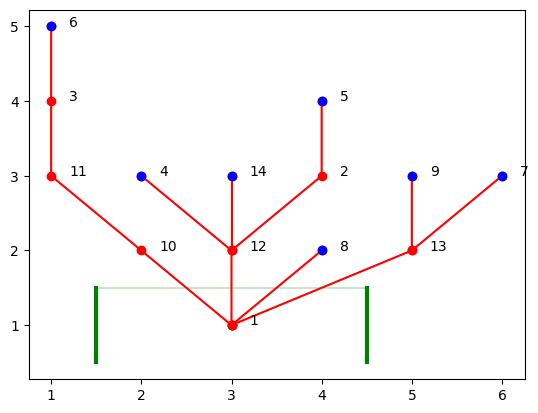

In [5]:
# Tree structure and not-switchable nodes
plt.plot([3, 2, 1, 1, 1], [1, 2, 3, 4, 5], 'ro-')
plt.plot([3, 3, 2], [1, 2, 3], 'ro-')
plt.plot([3, 3], [2, 3], 'ro-')
plt.plot([3, 4, 4], [2, 3, 4], 'ro-')
plt.plot([3, 4], [1, 2], 'ro-')
plt.plot([3, 5, 5], [1, 2, 3], 'ro-')
plt.plot([5, 6], [2, 3], 'ro-')
# Mark switchable nodes
plt.plot([1, 2, 3, 4, 4, 5, 6], [5, 3, 3, 4, 2, 3, 3], 'bo')
# Draw labels
plt.text(3.2, 1, "1"); plt.text(4.2, 3, "2"); plt.text(1.2, 4, "3")
plt.text(2.2, 3, "4"); plt.text(4.2, 4, "5"); plt.text(1.2, 5, "6")
plt.text(6.2, 3, "7"); plt.text(4.2, 2, "8"); plt.text(5.2, 3, "9")
plt.text(2.2, 2, "10"); plt.text(1.2, 3, "11"); plt.text(3.2, 2, "12")
plt.text(5.2, 2, "13"); plt.text(3.2, 3, "14")
# Draw "tube" with width 3
plt.plot([1.5, 1.5], [0.5, 1.5], 'g-', linewidth=3.0)
plt.plot([4.5, 4.5], [0.5, 1.5], 'g-', linewidth=3.0)
plt.plot([1.5, 4.5], [1.5, 1.5], 'g-', linewidth=0.3)
plt.show()

First, we want to place all nodes (goals) onto layers with maximum width of `WIDTH`. We start from `root` and move on edges.

In [12]:
from typing import Dict, List

def tube(edges: Dict[int, List[int]], roots: List[int], layers: List[List[int]]):
    new_layer: List[int] = roots[:WIDTH]
    new_roots: List[int] = roots[len(new_layer):] + [e for n in new_layer for e in edges[n]]
    return new_roots, layers + [new_layer]

In [14]:
r = [1]
l = []

while r:
    r, l = tube(edges, r, l)

l

[[1], [8, 10, 12], [13, 11, 2], [4, 14, 7], [9, 3, 5], [6]]

Let's visualise it as is.